In [2]:
import pandas as pd

Note: dependency on the eval_pipeline.ipynb for cached dataset generation

In [3]:
df = pd.read_parquet("../cache/eval_pipeline.parquet")
df

,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,latent_9,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
19196,0.292990,0.541875,-0.237049,-0.032857,-0.351980,0.733638,-0.313003,0.128665,-0.099631,-0.234924,...,True,None,None,None,None,None,None,9,records100/19000/19196_lr,records500/19000/19196_hr
3668,-0.165551,-0.081546,-0.193163,0.042614,0.654696,0.255240,0.468165,-0.555480,0.244313,-0.285057,...,True,None,None,None,None,None,None,8,records100/03000/03668_lr,records500/03000/03668_hr
14208,-0.416336,-0.250682,0.951321,0.190291,-0.489754,0.229042,-0.292869,-0.292163,0.298534,-0.071221,...,True,None,None,None,None,None,None,7,records100/14000/14208_lr,records500/14000/14208_hr
11998,-0.370392,0.030018,0.046648,0.480106,0.005712,-0.193515,0.078482,-0.000124,0.305600,-0.327691,...,True,None,None,None,None,None,None,1,records100/11000/11998_lr,records500/11000/11998_hr
20383,0.064888,-0.436333,0.576494,0.111732,-0.293115,-0.911887,0.158799,-0.266280,-0.179614,-0.214653,...,True,None,None,None,None,None,None,5,records100/20000/20383_lr,records500/20000/20383_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10243,-1.394182,-0.590800,0.530042,0.161419,0.388833,-0.198705,-0.410419,0.362616,-0.022701,0.137373,...,True,None,None,None,None,None,None,4,records100/10000/10243_lr,records500/10000/10243_hr
18045,-0.674545,0.290137,0.138001,0.173740,0.396240,-0.192699,0.182556,0.486441,0.462152,0.237036,...,False,None,None,None,None,None,None,6,records100/18000/18045_lr,records500/18000/18045_hr
16081,-0.439224,-0.359716,0.146834,0.494796,0.214289,0.050397,0.054304,0.015023,0.250305,0.342573,...,True,None,None,None,None,None,None,6,records100/16000/16081_lr,records500/16000/16081_hr


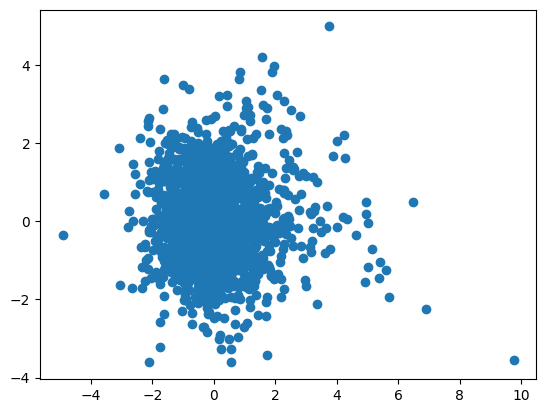

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

latent_vars = df[[c for c in df.columns if c.startswith('latent_')]]
latent_pca = PCA(n_components=2).fit_transform(latent_vars)

plt.scatter(latent_pca[:,0], latent_pca[:,1])

In [13]:
all_scps = pd.read_csv("../data/scp_statements.csv", index_col=0)
all_scps

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7
...,...,...,...,...,...,...,...,...,...,...,...,...
BIGU,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,1.0,NaN,NaN,Statements related to ectopic rhythm abnormali...,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,NaN,NaN
AFLT,atrial flutter,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,atrial flutter,51.0,MDC_ECG_RHY_ATR_FLUT,NaN,NaN
SVTAC,supraventricular tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,supraventricular tachycardia,55.0,MDC_ECG_RHY_SV_TACHY,NaN,D3-31290
PSVT,paroxysmal supraventricular tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,paroxysmal supraventricular tachycardia,NaN,MDC_ECG_RHY_SV_TACHY_PAROX,NaN,NaN


In [14]:
scp_cols = [c for c in df.columns if c.startswith('scp')]
scp_cols

['scp_codes']

In [15]:
df['scp_codes']

ecg_id
19196                           {'NORM': 100.0, 'SR': 0.0}
3668     {'AMI': 15.0, 'LAFB': 100.0, 'ABQRS': 0.0, 'SR...
14208                           {'NORM': 100.0, 'SR': 0.0}
11998                          {'AMI': 100.0, 'IMI': 15.0}
20383                           {'NORM': 100.0, 'SR': 0.0}
                               ...                        
10243    {'INJAS': 100.0, 'INJIL': 100.0, 'IRBBB': 100....
18045             {'ASMI': 100.0, 'ABQRS': 0.0, 'SR': 0.0}
16081                {'NDT': 100.0, 'NT_': 0.0, 'SR': 0.0}
15854                                      {'NORM': 100.0}
15125    {'IMI': 15.0, 'LVH': 100.0, 'ISC_': 50.0, 'PVC...
Name: scp_codes, Length: 1886, dtype: object